# Final Project - Data Science
## Research question - Will the airline passenger be satisfied? (Yes/No)
### Dataset - Airline Passenger Satisfaction
#### Daniel Augustin

## Libraries

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV

## Functions

In [25]:
def preprocess_data(df):    
    df[['Age','Flight Distance']] = df[['Age','Flight Distance']].astype("object")    
    numeric_features = ['Age','Flight Distance','Departure and Arrival Time Convenience','Ease of Online Booking',
                        'Check-in Service','Online Boarding','On-board Service','Seat Comfort','Leg Room Service',
                        'Cleanliness','Food and Drink','In-flight Service','In-flight Wifi Service','In-flight Entertainment','Baggage Handling']      
    categoric_features = ['Customer Type','Type of Travel','Class']      
    preprocessed_df = df[["Satisfaction"] + numeric_features + categoric_features]
    preprocessed_df = pd.get_dummies(data = preprocessed_df, columns = ['Satisfaction','Customer Type','Type of Travel','Class'], drop_first=True)   
    return(preprocessed_df)

def preprocess_data2(df):    
    df[['Age','Flight Distance']] = df[['Age','Flight Distance']].astype("object")    
    numeric_features = ['Age','Flight Distance','Departure and Arrival Time Convenience','Ease of Online Booking',
                        'Check-in Service','On-board Service','Seat Comfort','Leg Room Service',
                        'Cleanliness','Food and Drink','In-flight Service','In-flight Wifi Service','In-flight Entertainment','Baggage Handling']      
    categoric_features = ['Customer Type','Type of Travel','Class']      
    preprocessed_df = df[["Satisfaction"] + numeric_features + categoric_features]
    preprocessed_df = pd.get_dummies(data = preprocessed_df, columns = ['Satisfaction','Customer Type','Type of Travel','Class'], drop_first=True)   
    return(preprocessed_df)

## Import Data

In [3]:
df_raw = pd.read_csv('airline_passenger_satisfaction.csv')
df_raw

ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
...                 ...              ...            ...   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  ...  On-board Service  \
0                                            3  ...                 3   
1                                            2  ...                 5   
2                                            4  ...                 3   
3                                            2  ...                 5   
4                                            3  ...                 3   
...                                        ...  ...               ...   
129875                                       4  ...                 5   
129876                                       5  ...                 5   
129877                                       5  ...                 3   
129878                                       4  ...                 4   
129879                                       1  ...                 4   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0                  5                 2            5               5   
1                  4                 5            5               3   
2                  5                 3            5               5   
3                  5                 5            4               4   
4                  4                 4            5               4   
...              ...               ...          ...             ...   
129875             1                 4            4               4   
129876             2                 5            2               2   
129877             3                 4            3               3   
129878             4                 5            3               3   
129879             2                 4            2               2   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                       5                       3                        5   
1                       5                       2                        5   
2                       3                       4                        3   
3                       5                       2                        5   
4                       3                       3                        3   
...                   ...                     ...                      ...   
129875                  5                       4                        4   
129876                  4                       3           

## EDA
### Is there null?

In [4]:
df_raw.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

##### We can see there are 393 null objects in the column "Arrival Delay"

In [5]:
np.round((df_raw['Arrival Delay'].isna().sum()  / len(df_raw))*100,2)

0.3

##### and they are 0.3% of all objects in column

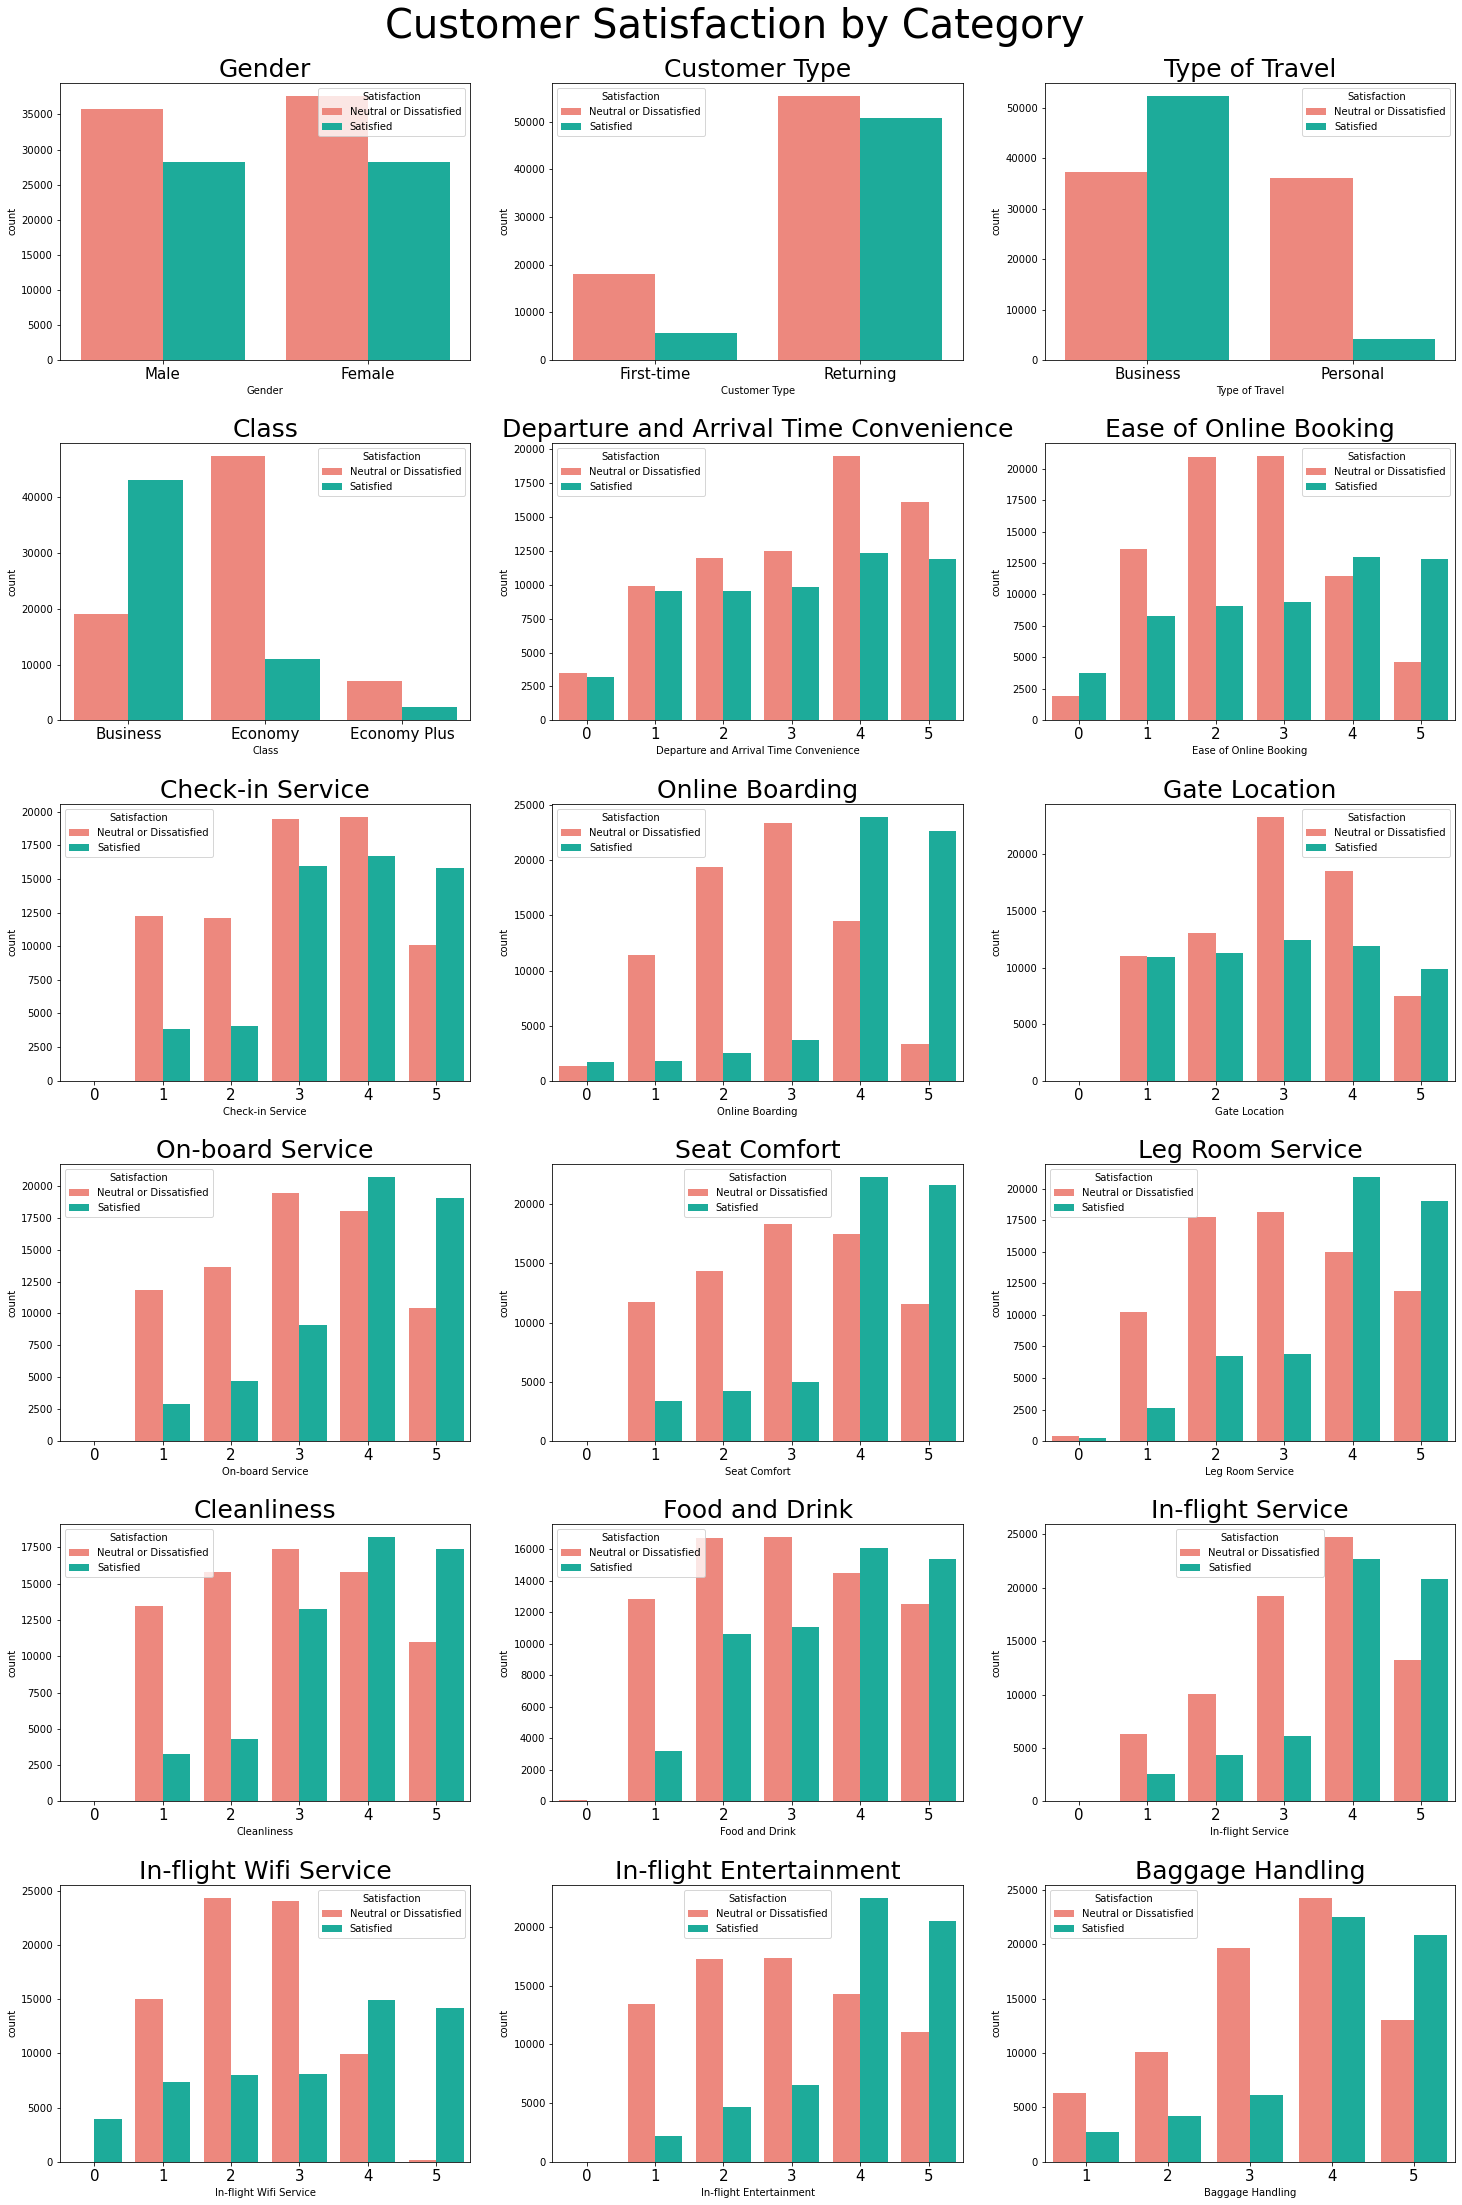

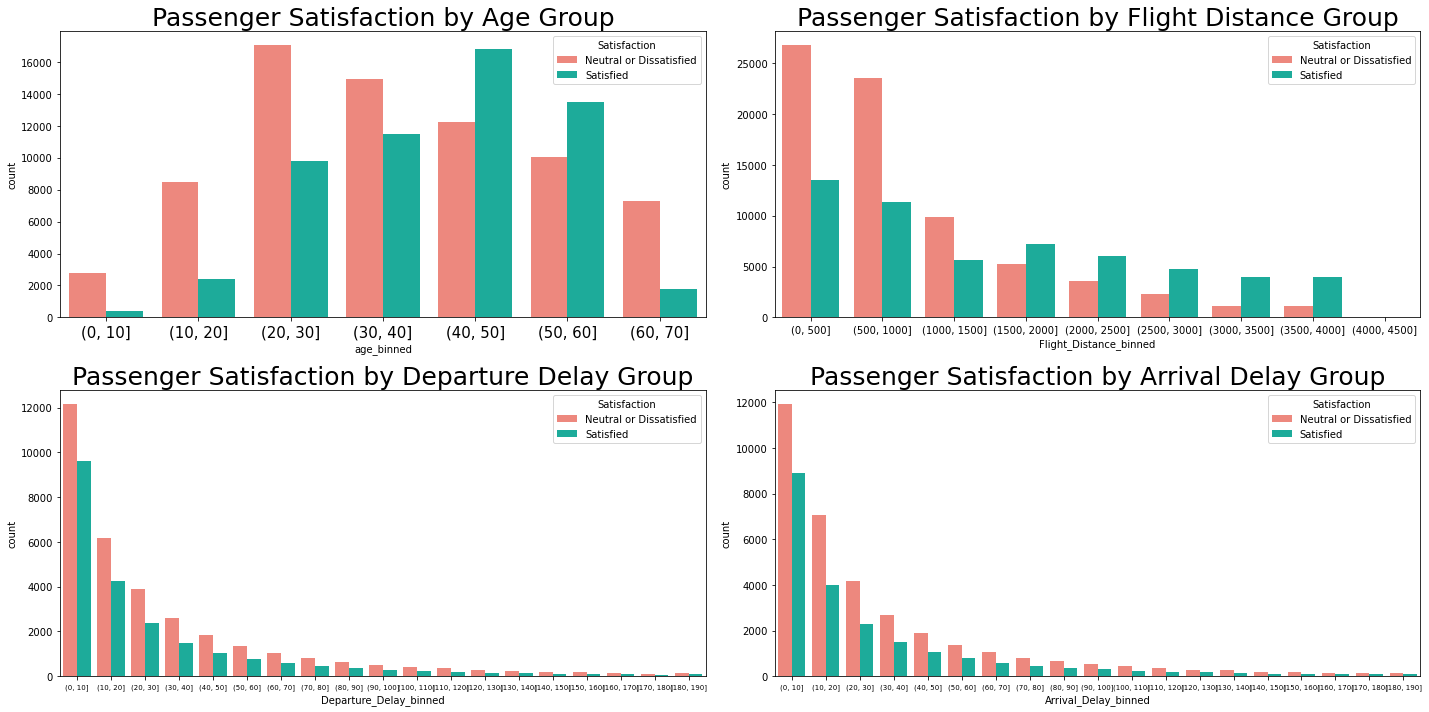

In [6]:
cmap = ["#ff796c", "#06c2ac"]
ct = ['Gender','Customer Type','Type of Travel', 'Class','Departure and Arrival Time Convenience','Ease of Online Booking',
      'Check-in Service', 'Online Boarding','Gate Location','On-board Service','Seat Comfort','Leg Room Service', 
      'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service','In-flight Entertainment',
      'Baggage Handling']
plt.figure(figsize=(25,35))
plt.suptitle("Customer Satisfaction by Category", fontsize=40)

for col in range(len(ct)):
    plt.subplot(6,3,col+1)
    plt.title(ct[col],fontdict={'fontsize': 40})
    plt.title(df_raw[ct[col]].name, fontdict={'fontsize': 25})
    ax = sns.countplot(x=df_raw[ct[col]],hue=df_raw['Satisfaction'], palette =cmap) 
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    plt.subplots_adjust(wspace = 0.2, hspace= 0.3, top=0.95)


temp = df_raw.assign(age_binned = pd.cut(df_raw["Age"],bins= range(0, 80, 10)))
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

ax = sns.countplot(data=temp, x="age_binned", hue="Satisfaction", palette=cmap, ax=axs[0, 0])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_title("Passenger Satisfaction by Age Group", fontsize=25)

temp = df_raw.assign(Flight_Distance_binned = pd.cut(df_raw["Flight Distance"],bins= range(0, 5000, 500)))
ax = sns.countplot(data=temp, x="Flight_Distance_binned", hue="Satisfaction", palette=cmap, ax=axs[0, 1])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_title("Passenger Satisfaction by Flight Distance Group", fontsize=25)

temp = df_raw.assign(Departure_Delay_binned = pd.cut(df_raw["Departure Delay"],bins= range(0, 200, 10)))
ax = sns.countplot(data=temp, x="Departure_Delay_binned", hue="Satisfaction", palette=cmap, ax=axs[1, 0])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_title("Passenger Satisfaction by Departure Delay Group", fontsize=25)

temp = df_raw.assign(Arrival_Delay_binned = pd.cut(df_raw["Arrival Delay"],bins= range(0, 200, 10)))
ax = sns.countplot(data=temp, x="Arrival_Delay_binned", hue="Satisfaction", palette=cmap, ax=axs[1, 1])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_title("Passenger Satisfaction by Arrival Delay Group", fontsize=25)

plt.tight_layout()

### ניתן לראות שמין הנוסע לא משפיע על כך אם הוא מרוצה או לא לכן נוותר עליו<br> ניתן לראות שדיליי ביציאה של הטיסה לא משפיע על כך אם הוא מרוצה או לא לכן נוותר עליו<br> ניתן לראות שדיליי בנחיתה של הטיסה לא משפיע על כך אם הוא מרוצה או לא לכן נוותר עליו<br> ניתן לראות שמיקום השער עליה למטוס לא כלכך משפיע אם הוא מרוצה או לא לכן נוותר עליו

In [7]:
df_raw.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


##### גיל ומרחק טיסה מופיעים כמספר לכן צריך להפוך אותם למספר בלי משמעות 

In [8]:
df_raw.dtypes.value_counts()

int64      18
object      5
float64     1
dtype: int64

## Preprocess Data

In [9]:
preprocess_df=preprocess_data(df_raw)
preprocess_df

Age Flight Distance  Departure and Arrival Time Convenience  \
0       48             821                                       3   
1       35             821                                       2   
2       41             853                                       4   
3       50            1905                                       2   
4       49            3470                                       3   
...     ..             ...                                     ...   
129875  28             447                                       4   
129876  41             308                                       5   
129877  42             337                                       5   
129878  50             337                                       4   
129879  20             337                                       1   

        Ease of Online Booking  Check-in Service  Online Boarding  \
0                            3                 4                3   
1                            2                 3                5   
2                            4                 4                5   
3                            2                 3                4   
4                            3                 3                5   
...                        ...               ...              ...   
129875                       4                 4                4   
129876                       3                 5                3   
129877                       2                 4                2   
129878                       4                 3                4   
129879                       3                 4                3   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                      3             5                 2            5   
1                      5             4                 5            5   
2                      3             5                 3            5   
3                      5             5                 5            4   
4                      3             4                 4            5   
...                  ...           ...               ...          ...   
129875                 5             1                 4            4   
129876                 5             2                 5            2   
129877                 3             3                 4            3   
129878                 4             4                 5            3   
129879                 4             2                 4            2   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
0                    5                  5                       3   
1                    3                  5                       2   
2                    5                  3                       4   
3                    4                  5                       2   
4                    4                  3                       3   
...                ...                ...                     ...   
129875               4                  5                       4   
129876               2                  4                       3   
129877               3                  4                       2   
129878               3                  4                       5   
129879               2                  2                       3   

        In-flight Entertainment  Baggage Handling  Satisfaction_Satisfied  \
0                             5                 5                       0   
1                             5                 5                       1   
2                             3                 3                       1   
3                             5                 5                       1   
4                             3                 3                       1   
...                         ...               ...                     ...   
129875                        4                 4                       0   
129876         

In [10]:
preprocess_df.dtypes

Age                                       object
Flight Distance                           object
Departure and Arrival Time Convenience     int64
Ease of Online Booking                     int64
Check-in Service                           int64
Online Boarding                            int64
On-board Service                           int64
Seat Comfort                               int64
Leg Room Service                           int64
Cleanliness                                int64
Food and Drink                             int64
In-flight Service                          int64
In-flight Wifi Service                     int64
In-flight Entertainment                    int64
Baggage Handling                           int64
Satisfaction_Satisfied                     uint8
Customer Type_Returning                    uint8
Type of Travel_Personal                    uint8
Class_Economy                              uint8
Class_Economy Plus                         uint8
dtype: object

##### ניתן לראות שמשתנה גיל ומרחק טיסה הפכו למספר חסר משמעות object

In [11]:
preprocess_df.dtypes.value_counts()

int64     13
uint8      5
object     2
dtype: int64

## Decision Tree Classifier

In [12]:
X_mat = preprocess_df.drop('Satisfaction_Satisfied' , axis= 1).values 
y_vec = preprocess_df['Satisfaction_Satisfied'].values

In [13]:
scaler = StandardScaler()
X_mat_norm = scaler.fit_transform(X_mat)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_mat_norm, y_vec, test_size=0.3, random_state=10)

In [15]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt=decision_tree.predict(X = X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [16]:
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree, X_mat_norm, y_vec, scoring = "accuracy", cv=10)),4)
print('Average Cross Validation Score "accuracy": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree, X_mat_norm, y_vec, scoring = "roc_auc", cv=10)),4)
print('Average Cross Validation Score "roc_auc": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree, X_mat_norm, y_vec, scoring = "precision", cv=10)),4)
print('Average Cross Validation Score "precision": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree, X_mat_norm, y_vec, scoring = "recall", cv=10)),4)
print('Average Cross Validation Score "recall": ', cross_val_score_data)

Average Cross Validation Score "accuracy":  0.9434
Average Cross Validation Score "roc_auc":  0.9423
Average Cross Validation Score "precision":  0.9325
Average Cross Validation Score "recall":  0.9371


## Logistic Regression

In [17]:
log_model = LogisticRegression()
log_model.fit(X=X_train, y=y_train)

y_pred_lr = log_model.predict(X = X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [18]:
cross_val_score_data=np.round(np.mean(cross_val_score(log_model, X_mat_norm, y_vec, scoring = "accuracy", cv=10)),4)
print('Average Cross Validation Score "accuracy": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(log_model, X_mat_norm, y_vec, scoring = "roc_auc", cv=10)),4)
print('Average Cross Validation Score "roc_auc": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(log_model, X_mat_norm, y_vec, scoring = "precision", cv=10)),4)
print('Average Cross Validation Score "precision": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(log_model, X_mat_norm, y_vec, scoring = "recall", cv=10)),4)
print('Average Cross Validation Score "recall": ', cross_val_score_data)

Average Cross Validation Score "accuracy":  0.8717
Average Cross Validation Score "roc_auc":  0.9259
Average Cross Validation Score "precision":  0.8689
Average Cross Validation Score "recall":  0.8305


## SVM

In [19]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [20]:
accuracy = np.round(accuracy_score(y_test, y_pred_svm),4)
print("Accuracy:", accuracy)

Accuracy: 0.8762


##### על מנת ליצור עקומת ROC_AUC<br> נשתמש במודל אחר על מנת לכייל את ההסתברויות<br> המודל הרגיל לא מאפשר ליצור עקומה כזאת

In [21]:
calibrated_svm_model = CalibratedClassifierCV(svm_model, method='sigmoid', cv='prefit')
calibrated_svm_model.fit(X_train, y_train)

y_pred_calibrated_svm = calibrated_svm_model.predict(X_test)
y_pred_calibrated_svm

array([1, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [22]:
accuracy = np.round(accuracy_score(y_test, y_pred_calibrated_svm),4)
print("Accuracy:", accuracy)

Accuracy: 0.8743


##### ניתן לראות שכשנבדוק את מדד האיכות בין שתי התחזיות של המודלים נקבל התאמה של כמעט 100% <br>כלומר אין השפעה של המודל החדש על המודל הקודם<br>שלב זה נעשה על מנת לאשר את זה שאפשר להשתמש במודל החדש כדי ליצור עקומת<br>roc_auc

In [23]:
accuracy = np.round(accuracy_score(y_pred_svm, y_pred_calibrated_svm),2)
print("Accuracy:", accuracy)

Accuracy: 0.99


## Comparison between the models

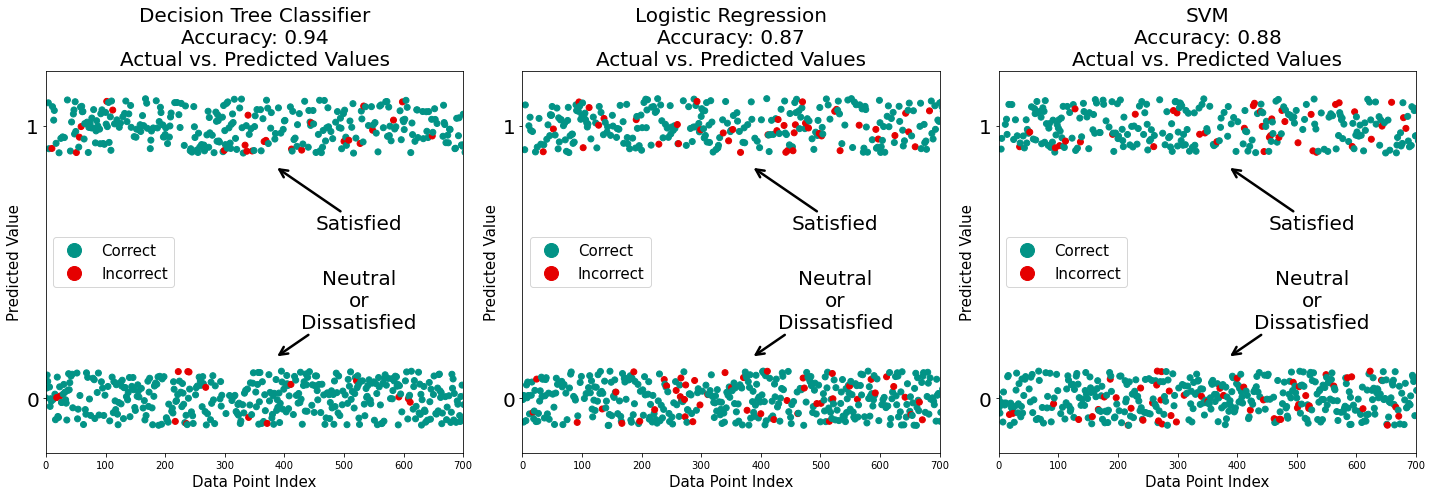

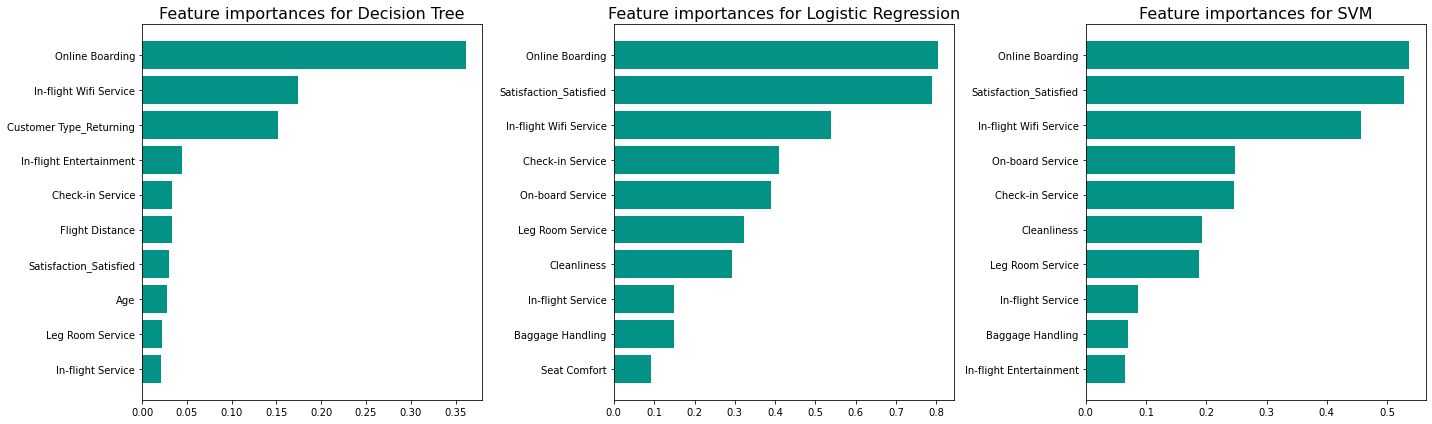

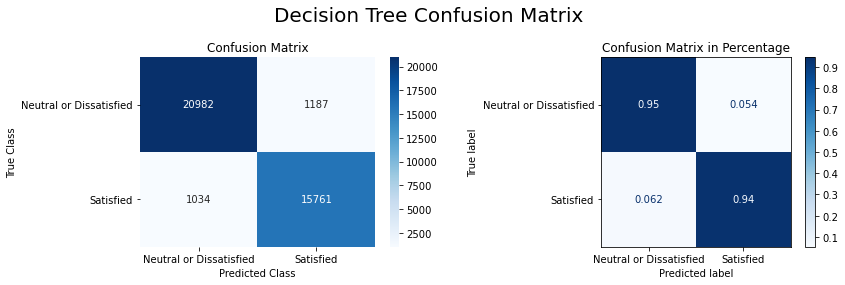

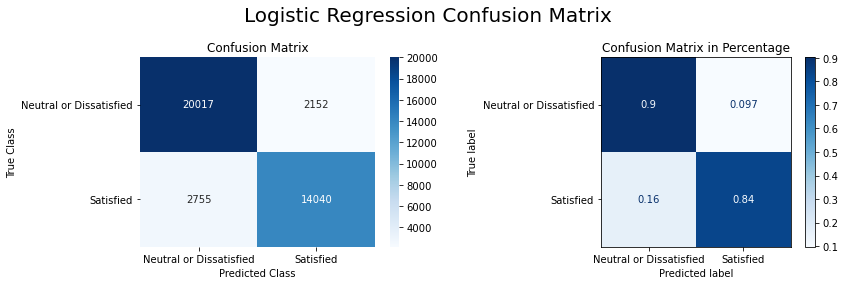

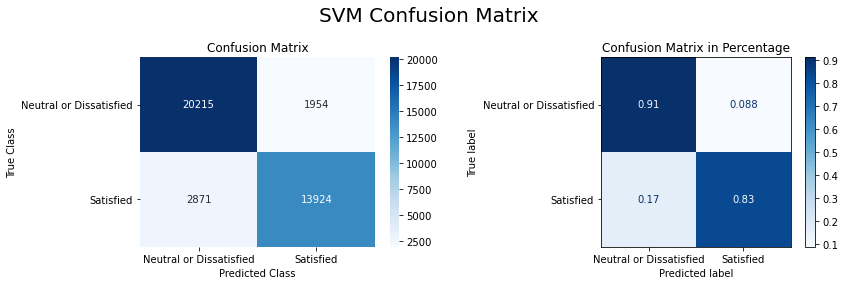

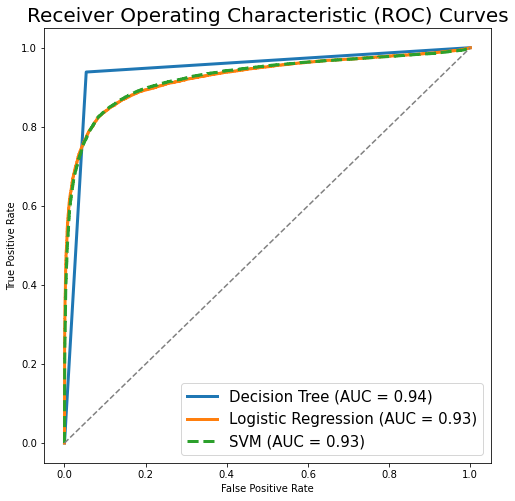

Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22169
           1       0.93      0.94      0.93     16795

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22169
           1       0.87      0.84      0.85     16795

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

SVM Metrics:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     22169
           1       0.88      0.83      0.85     16795

    accuracy                           0.88     38964
   macro avg       0.88      0.87      0.87     38964
weighted 

In [24]:
# Actual vs Predicted
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

# Decision Tree scatter actual vs predicted
accuracy = accuracy_score(y_test, y_pred_dt)

results_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred_dt})

results_df["correct"] = results_df["actual"] == results_df["predicted"]

axs[0].scatter(results_df[results_df["predicted"]==1].index,
           results_df[results_df["predicted"]==1]["predicted"] + np.random.rand(sum(results_df["predicted"]==1))/5,
           c=np.where(results_df[results_df["predicted"]==1]["correct"], "xkcd:teal", "xkcd:red"),
           label="Predicted 1")

axs[0].scatter(results_df[results_df["predicted"]==0].index,
           results_df[results_df["predicted"]==0]["predicted"] + np.random.rand(sum(results_df["predicted"]==0))/5,
           c=np.where(results_df[results_df["predicted"]==0]["correct"], "xkcd:teal", "xkcd:red"),
           label="Predicted 0")

axs[0].set_xlim([0, 700])

axs[0].set_yticks([0.1, 1.1])
axs[0].set_yticklabels(["0", "1"], fontsize=20)

axs[0].set_ylim([-0.1, 1.3])

axs[0].set_ylabel("Predicted Value", fontsize=15)
axs[0].set_xlabel("Data Point Index", fontsize=15)

axs[0].set_title(f'Decision Tree Classifier\nAccuracy: {accuracy:.2f}\nActual vs. Predicted Values', fontsize=20)

green_dot = plt.Line2D([], [], color='xkcd:teal', marker='o', linestyle='None',
                        markersize=14, label='Correct')
red_dot = plt.Line2D([], [], color='xkcd:red', marker='o', linestyle='None',
                      markersize=14, label='Incorrect')
axs[0].legend(handles=[green_dot, red_dot], loc="center left", fontsize=15)

arrow_1 = axs[0].annotate('Satisfied', xy=(0.55, 0.75), xytext=(0.75, 0.6), xycoords='axes fraction',
                      fontsize=20, color='black', ha='center', va='center',
                      arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

arrow_0 = axs[0].annotate('Neutral\nor\nDissatisfied', xy=(0.55, 0.25), xytext=(0.75, 0.4), xycoords='axes fraction',
                      fontsize=20, color='black', ha='center', va='center',
                      arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

# Logistic regression scatter actual vs predicted
accuracy = accuracy_score(y_test, y_pred_lr)

results_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred_lr})

results_df["correct"] = results_df["actual"] == results_df["predicted"]

axs[1].scatter(results_df[results_df["predicted"]==1].index,
           results_df[results_df["predicted"]==1]["predicted"] + np.random.rand(sum(results_df["predicted"]==1))/5,
           c=np.where(results_df[results_df["predicted"]==1]["correct"], "xkcd:teal", "xkcd:red"),
           label="Predicted 1")

axs[1].scatter(results_df[results_df["predicted"]==0].index,
           results_df[results_df["predicted"]==0]["predicted"] + np.random.rand(sum(results_df["predicted"]==0))/5,
           c=np.where(results_df[results_df["predicted"]==0]["correct"], "xkcd:teal", "xkcd:red"),
           label="Predicted 0")

axs[1].set_xlim([0, 700])

axs[1].set_yticks([0.1, 1.1])
axs[1].set_yticklabels(["0", "1"], fontsize=20)

axs[1].set_ylim([-0.1, 1.3])

axs[1].set_ylabel("Predicted Value", fontsize=15)
axs[1].set_xlabel("Data Point Index", fontsize=15)

axs[1].set_title(f'Logistic Regression\nAccuracy: {accuracy:.2f}\nActual vs. Predicted Values', fontsize=20)

green_dot = plt.Line2D([], [], color='xkcd:teal', marker='o', linestyle='None',
                        markersize=14, label='Correct')
red_dot = plt.Line2D([], [], color='xkcd:red', marker='o', linestyle='None',
                      markersize=14, label='Incorrect')
axs[1].legend(handles=[green_dot, red_dot], loc="center left", fontsize=15)

arrow_1 = axs[1].annotate('Satisfied', xy=(0.55, 0.75), xytext=(0.75, 0.6), xycoords='axes fraction',
                      fontsize=20, color='black', ha='center', va='center',
                      arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

arrow_0 = axs[1].annotate('Neutral\nor\nDissatisfied', xy=(0.55, 0.25), xytext=(0.75, 0.4), xycoords='axes fraction',
                      fontsize=20, color='black', ha='center', va='center',
                      arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

# SVM scatter actual vs predicted
accuracy = accuracy_score(y_test, y_pred_svm)

results_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred_svm})

results_df["correct"] = results_df["actual"] == results_df["predicted"]

axs[2].scatter(results_df[results_df["predicted"]==1].index,
           results_df[results_df["predicted"]==1]["predicted"] + np.random.rand(sum(results_df["predicted"]==1))/5,
           c=np.where(results_df[results_df["predicted"]==1]["correct"], "xkcd:teal", "xkcd:red"),
           label="Predicted 1")

axs[2].scatter(results_df[results_df["predicted"]==0].index,
           results_df[results_df["predicted"]==0]["predicted"] + np.random.rand(sum(results_df["predicted"]==0))/5,
           c=np.where(results_df[results_df["predicted"]==0]["correct"], "xkcd:teal", "xkcd:red"),
           label="Predicted 0")

axs[2].set_xlim([0, 700])

axs[2].set_yticks([0.1, 1.1])
axs[2].set_yticklabels(["0", "1"], fontsize=20)

axs[2].set_ylim([-0.1, 1.3])

axs[2].set_ylabel("Predicted Value", fontsize=15)
axs[2].set_xlabel("Data Point Index", fontsize=15)

axs[2].set_title(f'SVM\nAccuracy: {accuracy:.2f}\nActual vs. Predicted Values', fontsize=20)

green_dot = plt.Line2D([], [], color='xkcd:teal', marker='o', linestyle='None',
                        markersize=14, label='Correct')
red_dot = plt.Line2D([], [], color='xkcd:red', marker='o', linestyle='None',
                      markersize=14, label='Incorrect')
axs[2].legend(handles=[green_dot, red_dot], loc="center left", fontsize=15)

arrow_1 = axs[2].annotate('Satisfied', xy=(0.55, 0.75), xytext=(0.75, 0.6), xycoords='axes fraction',
                      fontsize=20, color='black', ha='center', va='center',
                      arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

arrow_0 = axs[2].annotate('Neutral\nor\nDissatisfied', xy=(0.55, 0.25), xytext=(0.75, 0.4), xycoords='axes fraction',
                      fontsize=20, color='black', ha='center', va='center',
                      arrowprops=dict(facecolor='black', arrowstyle='->', lw=2.5))

plt.tight_layout()

# Decision Tree feature importances
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

def f_importances(coef, names, top=-1, ax=None):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    if top == -1:
        top = len(names)
    ax.barh(range(top), imp[::-1][0:top], align='center', color='xkcd:teal', height=0.8)
    ax.set_yticks(range(top))
    ax.set_yticklabels(names[::-1][0:top])
    ax.invert_yaxis()
    ax.set_title('Feature importances for Decision Tree', fontsize=16)

features_names = list(preprocess_df.columns)
f_importances(decision_tree.feature_importances_, features_names, top=10, ax=axes[0])

# Logistic Regression feature importances
def f_importances(coef, names, top=-1, ax=None):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    if top == -1:
        top = len(names)
    ax.barh(range(top), imp[::-1][0:top], align='center', color='xkcd:teal', height=0.8)
    ax.set_yticks(range(top))
    ax.set_yticklabels(names[::-1][0:top])
    ax.invert_yaxis()
    ax.set_title('Feature importances for Logistic Regression', fontsize=16)

features_names = list(preprocess_df.columns)
f_importances(log_model.coef_[0], features_names, top=10, ax=axes[1])

# SVM feature importances
def f_importances(coef, names, top=-1, ax=None):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    if top == -1:
        top = len(names)
    ax.barh(range(top), imp[::-1][0:top], align='center', color='xkcd:teal', height=0.8)
    ax.set_yticks(range(top))
    ax.set_yticklabels(names[::-1][0:top])
    ax.invert_yaxis()
    ax.set_title('Feature importances for SVM', fontsize=16)

features_names = list(preprocess_df.columns)
f_importances(svm_model.coef_[0], features_names, top=10, ax=axes[2])

plt.tight_layout()
plt.show()

# Decision Tree confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
class_names = ['Neutral or Dissatisfied', 'Satisfied']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Decision Tree Confusion Matrix', fontsize=20)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_xlabel("Predicted Class")
axs[0].set_ylabel("True Class")
axs[0].set_title('Confusion Matrix')

disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true', ax=axs[1])
disp.ax_.set_title('Confusion Matrix in Percentage')

plt.tight_layout()
plt.show()

# Logistic Regression confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
class_names = ['Neutral or Dissatisfied', 'Satisfied']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Logistic Regression Confusion Matrix', fontsize=20)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_xlabel("Predicted Class")
axs[0].set_ylabel("True Class")
axs[0].set_title('Confusion Matrix')

disp = plot_confusion_matrix(log_model, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true', ax=axs[1])
disp.ax_.set_title('Confusion Matrix in Percentage')

plt.tight_layout()
plt.show()

# SVM confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
class_names = ['Neutral or Dissatisfied', 'Satisfied']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('SVM Confusion Matrix', fontsize=20)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_xlabel("Predicted Class")
axs[0].set_ylabel("True Class")
axs[0].set_title('Confusion Matrix')

disp = plot_confusion_matrix(svm_model, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true', ax=axs[1])
disp.ax_.set_title('Confusion Matrix in Percentage')

plt.tight_layout()
plt.show()

# roc_auc curves
# Decision tree
y_prob_dt = decision_tree.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Logistic regression
y_prob_lr = log_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# SVM
y_prob_calibrated_svm = calibrated_svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_calibrated_svm)
roc_auc = roc_auc_score(y_test, y_prob_calibrated_svm)

# Plot ROC curves
plt.figure(figsize=(8,8))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})",lw=3)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})",lw=3)
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(roc_auc), linestyle='--', lw=3)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=20)
plt.legend(fontsize=15)
plt.show()

# models classification reports
# Decision tree
print("Decision Tree Metrics:")
print(classification_report(y_test, y_pred_dt))

# Logistic regression
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))

# SVM
print("SVM Metrics:")
print(classification_report(y_test, y_pred_svm))

In [26]:
data1=preprocess_data2(df_raw)
data1

Age Flight Distance  Departure and Arrival Time Convenience  \
0       48             821                                       3   
1       35             821                                       2   
2       41             853                                       4   
3       50            1905                                       2   
4       49            3470                                       3   
...     ..             ...                                     ...   
129875  28             447                                       4   
129876  41             308                                       5   
129877  42             337                                       5   
129878  50             337                                       4   
129879  20             337                                       1   

        Ease of Online Booking  Check-in Service  On-board Service  \
0                            3                 4                 3   
1                            2                 3                 5   
2                            4                 4                 3   
3                            2                 3                 5   
4                            3                 3                 3   
...                        ...               ...               ...   
129875                       4                 4                 5   
129876                       3                 5                 5   
129877                       2                 4                 3   
129878                       4                 3                 4   
129879                       3                 4                 4   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0                  5                 2            5               5   
1                  4                 5            5               3   
2                  5                 3            5               5   
3                  5                 5            4               4   
4                  4                 4            5               4   
...              ...               ...          ...             ...   
129875             1                 4            4               4   
129876             2                 5            2               2   
129877             3                 4            3               3   
129878             4                 5            3               3   
129879             2                 4            2               2   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                       5                       3                        5   
1                       5                       2                        5   
2                       3                       4                        3   
3                       5                       2                        5   
4                       3                       3                        3   
...                   ...                     ...                      ...   
129875                  5                       4                        4   
129876                  4                       3                        2   
129877                  4                       2                        3   
129878                  4                       5                        3   
129879                  2                       3                        2   

        Baggage Handling  Satisfaction_Satisfied  Customer Type_Returning  \
0                      5                       0                        0   
1                      5                       1                        1   
2                      3                       1                        1   
3                      5                       1                        1   
4                      3                       1                        1   
...                  ...                     ...                      ...

In [27]:
X_mat = data1.drop('Satisfaction_Satisfied' , axis= 1).values 
y_vec = data1['Satisfaction_Satisfied'].values

In [28]:
scaler = StandardScaler()
X_mat_norm = scaler.fit_transform(X_mat)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_mat_norm, y_vec, test_size=0.3, random_state=10)

In [30]:
decision_tree2=DecisionTreeClassifier()
decision_tree2.fit(X_train, y_train)

y_pred_dt=decision_tree2.predict(X = X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [31]:
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree2, X_mat_norm, y_vec, scoring = "accuracy", cv=10)),4)
print('Average Cross Validation Score "accuracy": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree2, X_mat_norm, y_vec, scoring = "roc_auc", cv=10)),4)
print('Average Cross Validation Score "roc_auc": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree2, X_mat_norm, y_vec, scoring = "precision", cv=10)),4)
print('Average Cross Validation Score "precision": ', cross_val_score_data)
cross_val_score_data=np.round(np.mean(cross_val_score(decision_tree2, X_mat_norm, y_vec, scoring = "recall", cv=10)),4)
print('Average Cross Validation Score "recall": ', cross_val_score_data)

Average Cross Validation Score "accuracy":  0.9412
Average Cross Validation Score "roc_auc":  0.9407
Average Cross Validation Score "precision":  0.9313
Average Cross Validation Score "recall":  0.9348


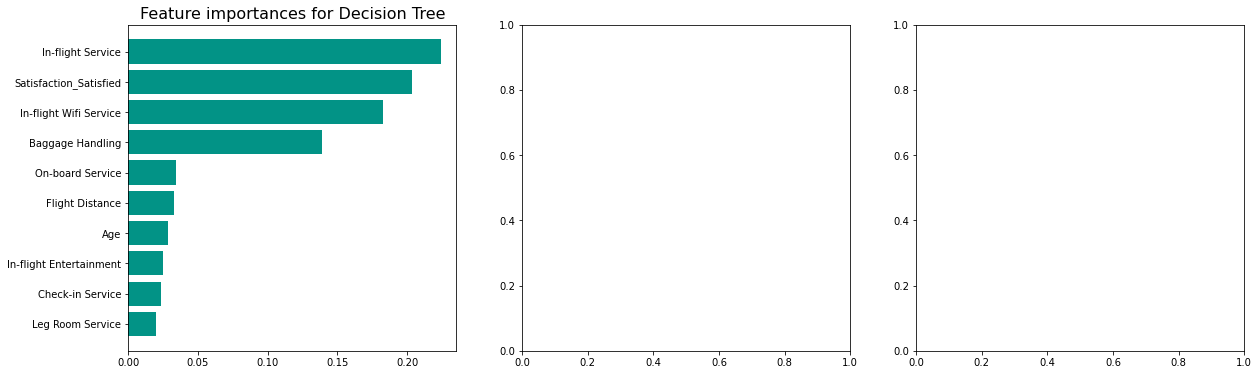

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
def f_importances(coef, names, top=-1, ax=None):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    if top == -1:
        top = len(names)
    ax.barh(range(top), imp[::-1][0:top], align='center', color='xkcd:teal', height=0.8)
    ax.set_yticks(range(top))
    ax.set_yticklabels(names[::-1][0:top])
    ax.invert_yaxis()
    ax.set_title('Feature importances for Decision Tree', fontsize=16)

features_names = list(preprocess_df.columns)
f_importances(decision_tree2.feature_importances_, features_names, top=10, ax=axes[0])